In [6]:
import os
import matplotlib.pyplot as plt

os.system("mkdir -p fig")

NameError: name 'os' is not defined

{'realsim', 'letter', 'msd', 'covtype', 'radar', 'gisette'}


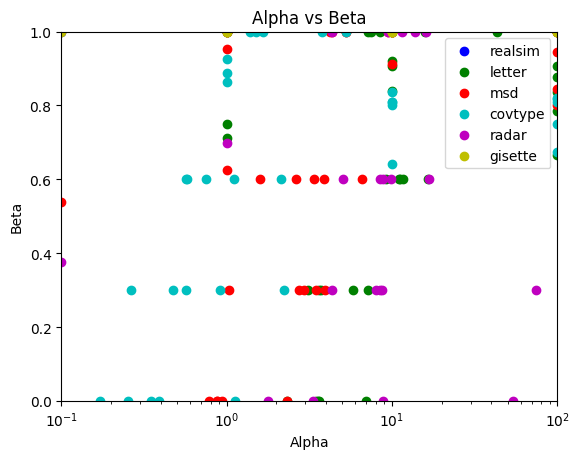

In [ ]:
data = []
for i in range(5):
    with open(f"alpha_beta_seed{i}.log") as f:
        lines = f.readlines()
        for line in lines:
            dataset, alpha, beta = line.split(', ')
            if beta.strip() == 'nan':
                continue
            alpha = float(alpha)
            beta = float(beta)
            if beta > 1.0:
                beta = 1.0
            data.append((dataset, alpha, beta))
            # print(dataset, alpha, beta)


datasets = set([d[0] for d in data])
print(datasets)
colors = ["b", "g", "r", "c", "m", "y", "k"]

fig, ax = plt.subplots()

aa = []
bb = []
for i, dataset in enumerate(datasets):
    dataset_data = [d for d in data if d[0] == dataset]
    alphas = [d[1] for d in dataset_data]
    betas = [d[2] for d in dataset_data]
    aa = aa + alphas
    bb = bb + betas
    ax.scatter(alphas, betas, c=colors[i], label=dataset)

ax.set_ylim([0, 1])
ax.set_xlim([0.1, 100])
ax.set_xlabel("Alpha")
ax.set_ylabel("Beta")
ax.set_xscale('log')
ax.set_title("Alpha vs Beta")
ax.legend()

plt.show()

1.0


FileNotFoundError: [Errno 2] No such file or directory: 'fig/data-dist-full.png'

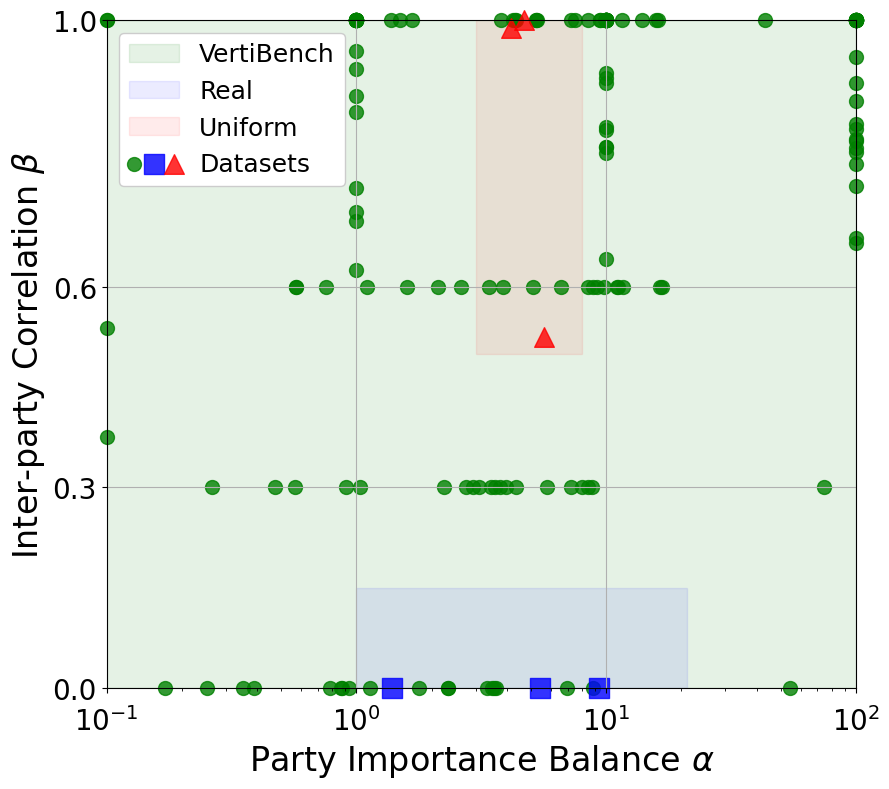

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

wide_alpha = 1.385463580447053
vehicle_alpha = 9.391216110332813
satellite_alpha = 5.4086567124637615
alpha_shuffle_wide = 4.703892330307253
alpha_shuffle_vehicle = 4.154390897214498
alpha_shuffle_satellite = 5.630092966674526


beta_wide = -0.4087178439523903
beta_vehicle = 5.376097922397998e-08
beta_satellite =-1.2892906879491686
beta_shuffle_wide = 1.0
beta_shuffle_vehicle =0.9886110591172752
beta_shuffle_satellite =0.5257661228970268

def round_in_range(x, min_x=0., max_x=1.):
    if x < min_x:
        return min_x
    elif x > max_x:
        return max_x
    else:
        return x



# plot the results of both original and shuffled
# plot the distribution of alpha and beta in one image, one dimension is importance-alpha, the other is correlation-beta
# each dataset is a point in plot
wide_beta_round = round_in_range(beta_wide)
vehicle_beta_round = round_in_range(beta_vehicle)
satellite_beta_round = round_in_range(beta_satellite)
wide_shuffle_beta_round = round_in_range(beta_shuffle_wide)
vehicle_shuffle_beta_round = round_in_range(beta_shuffle_vehicle)
satellite_shuffle_beta_round = round_in_range(beta_shuffle_satellite)

fig, ax = plt.subplots(figsize=(9, 8))

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerTuple
e = Rectangle((0, 0), 1000, height=1)
e.set_clip_box(ax.bbox)
e.set_alpha(0.1)
e.set_color("green")
e.set_label("VertiBench")
ax.add_artist(e)

e = Rectangle(xy=(1.0,0), width=20, height=0.15)
e.set_clip_box(ax.bbox)
e.set_alpha(0.08)
e.set_color("blue")
e.set_label("Real")
ax.add_artist(e)

print(np.max([np.max(wide_shuffle_beta_round),np.max(vehicle_shuffle_beta_round),np.max(satellite_shuffle_beta_round)]))
e = Rectangle(xy=(3, 0.5), width=5, height=1, color='red')
e.set_clip_box(ax.bbox)
e.set_alpha(0.08)
e.set_color("red")
e.set_label("Uniform")
ax.add_artist(e)

p1 = ax.scatter(aa, bb, c="green", marker="o", label=rf"VertiBench",
           s=100, clip_on=False, alpha=0.8)


p2 = ax.scatter(wide_alpha, wide_beta_round, c="blue", marker="s", label=rf"NUS-WIDE",
           s=200, clip_on=False, alpha=0.8)
ax.scatter(vehicle_alpha, vehicle_beta_round, c="blue", marker="s", label=rf"Vehicle",
           s=200, clip_on=False, alpha=0.8)
ax.scatter(satellite_alpha, satellite_beta_round, c="blue", marker="s", label=rf"Satellite",
           s=200, clip_on=False, alpha=0.8)

p3 = ax.scatter(alpha_shuffle_wide, wide_shuffle_beta_round, marker="^", label=rf"NUS-WIDE-shuffle",
s=200, clip_on=False, alpha=0.8, color='red', edgecolor='red')
ax.scatter(alpha_shuffle_vehicle, vehicle_shuffle_beta_round, marker="^", label=rf"Vehicle-shuffle",
s=200, clip_on=False, alpha=0.8, color='red', edgecolor='red')
ax.scatter(alpha_shuffle_satellite, satellite_shuffle_beta_round, marker="^", label=rf"Satellite-shuffle",
s=200, clip_on=False, alpha=0.8, color='red', edgecolor='red')


# but keep rectangle legend
handles, labels = ax.get_legend_handles_labels()

handles = handles[:3]
labels = labels[:3]
handles.append((p1,p2,p3))
labels.append('Datasets')

ax.legend(handles, labels, fontsize=18, loc="upper left", handler_map={tuple: HandlerTuple(ndivide=None)}, facecolor='white', framealpha=1.0)




ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r"Party Importance Balance $\alpha$", fontsize=24)
ax.set_ylabel(r"Inter-party Correlation $\beta$", fontsize=24)
ax.set_xlim([10**-1, 10**2])
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.3, 0.6, 1])
# set xaxis as log scale
ax.set_xscale("log")
# ax.legend(fontsize=10, loc="upper left")
ax.grid(True)

# rotate x axis label position
ax.tick_params(axis='x', rotation=0, pad=10)


# # 设置格子间距
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.3))

ax.set_facecolor('#ffffff')
plt.tight_layout()
plt.savefig("fig/data-dist-full.png", dpi=300)
plt.show()